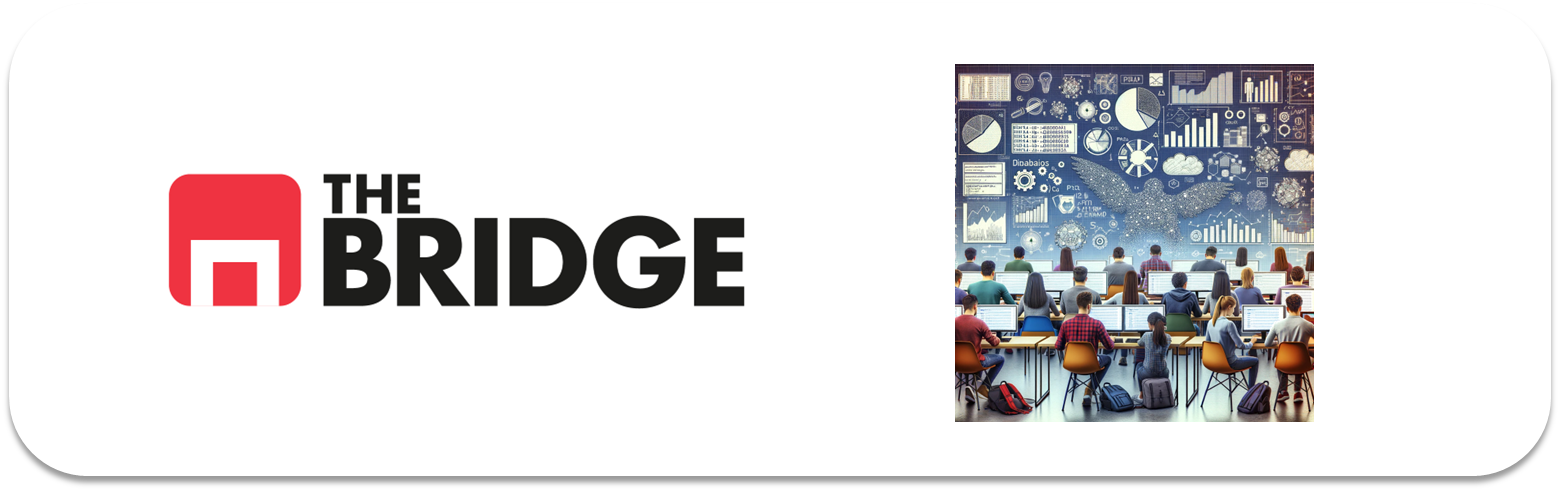

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [4]:
# Carga del dataset
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep ="|")

# Vista rápida
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.


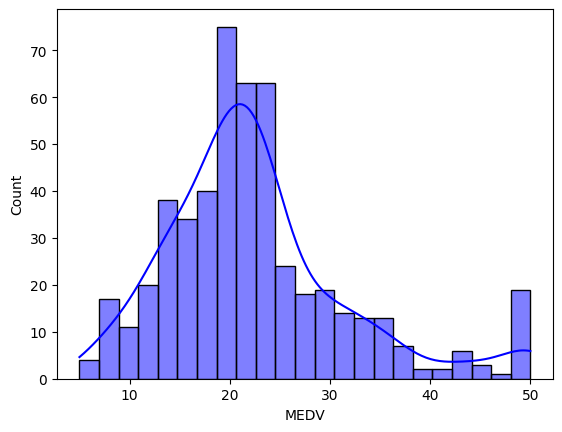

In [6]:
# quiero predecir la target prize, así que hago histograma del target, 
# si tiene forma de campana de gauss es ideal para aplicar regresión lineal
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.


4. Construye las parejas X,y de train y test


In [8]:
# Separación de variables
X = df.drop(columns="MEDV")
y = df["MEDV"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.


In [13]:
# Correlación con el target
corr_target = df.corr()["MEDV"].sort_values(ascending=False)
corr_target


MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

las más correlacionadas con el target con RM, LSTAT y PTRATIO. Como luego voy a regularizar el modelo, solo voy a quitar la menos correlacionada que es CHAS.

In [15]:
# Correlación con el resto
corr = df.corr(numeric_only=True)
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


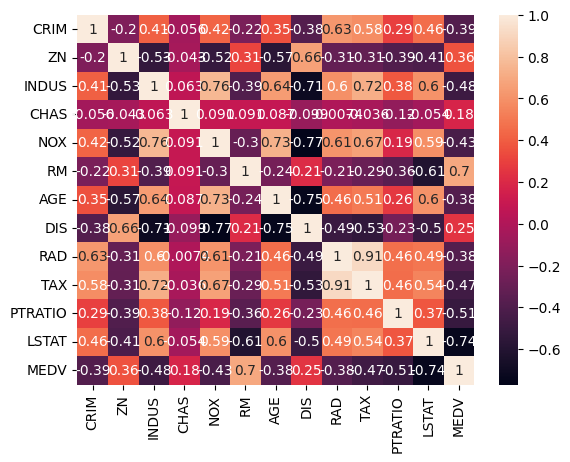

In [ ]:
# analizamos las correlaciones de las variables
df.corr(numeric_only= True)
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show();

INDUS está muy correlacionada con NOX, AGE, DIS, TAX
NOX con AGE, DIS
AGE con DIS

Por tanto, voy a quitar INDUS y NOX

In [16]:
# Columnas a eliminar según el mini-EDA
cols_to_drop = ["CHAS", "INDUS", "NOX"]

X_train = X_train.drop(columns=cols_to_drop)
X_test = X_test.drop(columns=cols_to_drop)

X_train.shape, X_test.shape


((404, 9), (102, 9))

Tras analizar la correlación de las variables con el target y la correlación entre las propias features, se decidió eliminar las variables CHAS, INDUS y NOX.
CHAS presenta una correlación muy baja con MEDV, mientras que INDUS y NOX muestran una alta correlación con otras variables explicativas, lo que podría introducir problemas de multicolinealidad en el modelo lineal.
La eliminación de estas variables se realizó tras el split de los datos, manteniendo la coherencia entre los conjuntos de entrenamiento y test.

6. Trata las variables para que funcionen lo mejor posible en el modelo.


Vamos a escalar algunas variables ya que las variables están en escalas muy distintas

CRIM → valores pequeños

TAX → cientos

DIS → decimales

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustamos SOLO con train
X_train_scaled = scaler.fit_transform(X_train)

# Transformamos test con los parámetros de train
X_test_scaled = scaler.transform(X_test)

# vuelvo a dataframes
X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,index=X_train.index)

X_test_scaled = pd.DataFrame(X_test_scaled,
    columns=X_test.columns,index=X_test.index)


7. Construye un modelo de regresión lineal.


In [20]:
# Creamos el modelo
lm = LinearRegression()

# Entrenamos con los datos de train
lm.fit(X_train_scaled, y_train)

# predecimos
y_train_pred = lm.predict(X_train_scaled)
y_test_pred = lm.predict(X_test_scaled)


8. Analiza si lo crees conveniente los pesos y la importancia de las features.


In [28]:
# vemos el término independiente
lm.intercept_

np.float64(22.796534653465343)

In [24]:
# vemos los coeficientes
coef_df = pd.DataFrame(lm.coef_, X_train_scaled.columns, columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-1.105142
ZN,0.885398
RM,3.160035
AGE,-0.476717
DIS,-2.567676
RAD,1.997459
TAX,-2.521054
PTRATIO,-1.597658
LSTAT,-4.164093


El análisis de los coeficientes del modelo muestra que el número medio de habitaciones (RM) tiene el mayor impacto positivo sobre el valor de la vivienda, mientras que variables socioeconómicas como LSTAT y PTRATIO presentan un impacto negativo significativo.
Dado que las variables fueron previamente estandarizadas, los coeficientes permiten comparar directamente la importancia relativa de cada feature en el modelo.

8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.


In [ ]:

# Train error
print("TRAIN ERROR:")
print('MAE train', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE train', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 train', r2_score(y_train,y_train_pred))

# Test error
print("TEST ERROR:")
print('MAE test', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE test', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 test', r2_score(y_test,y_test_pred))

TRAIN ERROR:
MAE train 3.4741059798621174
MSE train 24.10027074870941
RMSE train 4.90920265916059
R2 train 0.7225817144790362
TEST ERROR:
MAE test 3.178315080825157
MSE test 24.499488461778526
RMSE test 4.949695794872501
R2 test 0.6659181156900424


El error medio absoluto es de unos 3.000–3.500 $

El RMSE penaliza más los errores grandes, pero sigue siendo razonable

Los valores de train y test son muy similares

Según el R2, El modelo explica aproximadamente:
72% de la variabilidad del precio en train
67% de la variabilidad en test

El modelo de regresión lineal presenta un rendimiento adecuado tanto en entrenamiento como en test, con valores de MAE y RMSE similares en ambos conjuntos, lo que indica una buena capacidad de generalización. El coeficiente de determinación R² muestra que el modelo es capaz de explicar alrededor del 67% de la variabilidad del precio de la vivienda en el conjunto de test. La coherencia entre métricas y la comparación gráfica entre valores reales y predichos confirman un ajuste razonable del modelo.

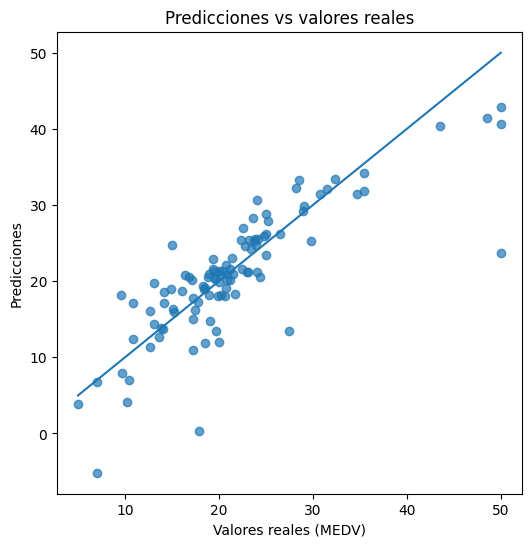

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Valores reales (MEDV)")
plt.ylabel("Predicciones")
plt.title("Predicciones vs valores reales")
plt.show()


9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

α = 0.1 → regularización suave
α = 1 → regularización moderada
α = 10 → regularización fuerte

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

alphas = [0.1, 1, 10]

ridge_results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    y_test_pred_ridge = ridge.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_test_pred_ridge)
    mse = mean_squared_error(y_test, y_test_pred_ridge)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred_ridge)
    
    ridge_results.append({
        "alpha": alpha,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

ridge_results


[{'alpha': 0.1,
  'MAE': 3.177386604651935,
  'RMSE': np.float64(4.949866082045397),
  'R2': 0.6658951280800722},
 {'alpha': 1,
  'MAE': 3.169507237779911,
  'RMSE': np.float64(4.9514277593681815),
  'R2': 0.6656842753817388},
 {'alpha': 10,
  'MAE': 3.1352904427192,
  'RMSE': np.float64(4.9673639331296275),
  'R2': 0.6635288214953674}]

10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

Se aplicó regularización Ridge probando distintos valores del hiperparámetro α. Los resultados obtenidos son muy similares a los del modelo de regresión lineal base, lo que indica que el modelo es estable y no presenta problemas significativos de multicolinealidad. 

En consecuencia, la regularización confirma la solidez del modelo inicial sin aportar mejoras sustanciales en capacidad predictiva.